# Week 2

### Part 1: Basic mathematical description of networks

Exercises: Chapter 2 in Network Science.

    Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?


#### Answer

Real networks are sparse since the number of potential links will be larger than the number of the connected links. Example with social media one person can follow another but that doesn't mean that the other person will follow back.

In twitter Eg. a invidual can have a lot of connections but since twitter is so large the potential amount of connections won't be insufficent and will therefore still be a sparse network.

### Part 2: Exercises using the NetworkX library

Exercise:

    Write the solution exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
    
    Which of the icons in the Image in 2.12 in the book can be drawn without raising your pencil from the paper, and without drawing any line more than once? Why? 

##### Answer

    All of them except B can be drawn without lifting the pen. If the number of nodes are even then it is possible.

Exercise:

    Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use NetworkX, but simple pen and paper).

##### Answer

Graph with 6 nodes and 7 edges


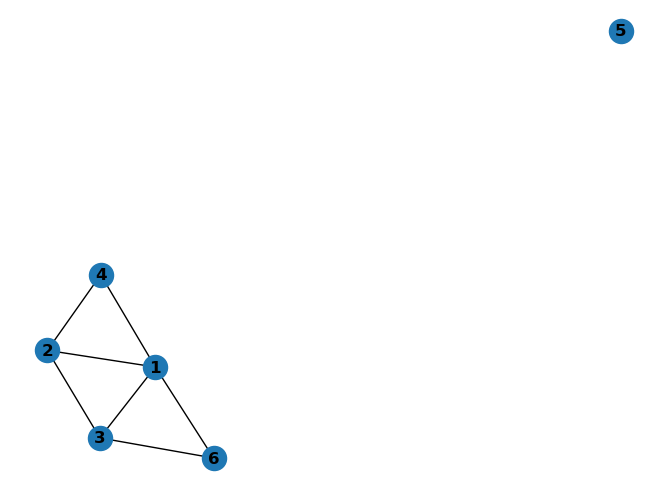

In [2]:
# Graph A

import networkx as nx
G = nx.Graph()
G.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (6, 3), (4, 2)])
G.add_node(5)
list(nx.connected_components(G))

print(G)

nx.draw(G, with_labels=True, font_weight='bold')

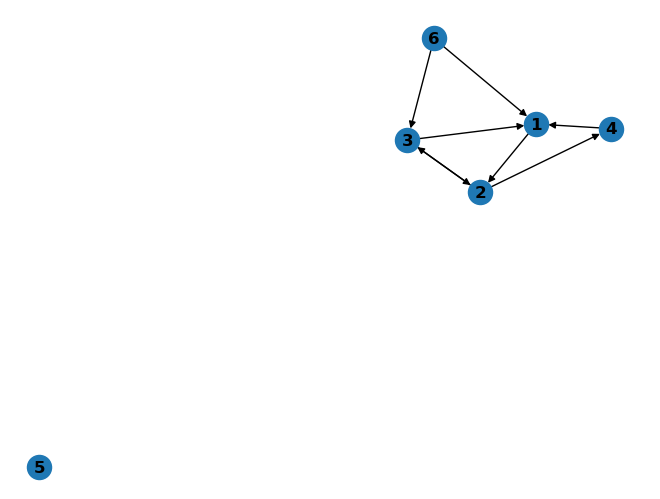

In [9]:
#Graph B

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([(4, 1), (3, 1), (6, 1), (1, 2), (3, 2), (2, 3), (6, 3), (2, 4)])

G.add_node(5)

nx.draw(G, with_labels=True, font_weight='bold', arrows=True)
plt.show()

Exercise 

       The corresponding adjacency matrices.

In [18]:
# A
(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (6, 3), (4, 2)

((1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (6, 3), (4, 2))

In [10]:
# B
(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (2, 3), (6, 3), (4, 2)

((1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (2, 3), (6, 3), (4, 2))

Exercise 

    The corresponding link lists.

In [23]:
import networkx as nx

# Create the directed graph
G = nx.DiGraph()
G.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (2, 3), (6, 3), (4, 2)])
G.add_node(5)

# Define the linked list node class
class LinkedListNode:
    def __init__(self, value):
        self.value = value
        self.next = None

# Function to convert a graph's adjacency list to a linked list for each node
def graph_to_linked_list(graph):
    linked_list_dict = {}

    for node in graph.nodes:
        # Create the head of the linked list for this node
        if node not in linked_list_dict:
            linked_list_dict[node] = LinkedListNode(node)
        
        head = linked_list_dict[node]
        current = head
        
        # For each successor (neighbor) of the node, create a linked list node
        for neighbor in graph.successors(node):
            new_node = LinkedListNode(neighbor)
            current.next = new_node
            current = current.next

    return linked_list_dict

# Convert the directed graph to linked lists
linked_lists = graph_to_linked_list(G)

# Function to print linked list
def print_linked_list(node):
    current = node
    while current:
        print(f"{current.value} -> ", end="")
        current = current.next
    print("None")

# Print the linked list for each node
for node in linked_lists:
    print(f"Linked list for node {node}: ", end="")
    print_linked_list(linked_lists[node])


Linked list for node 1: 1 -> 4 -> 3 -> 6 -> 2 -> None
Linked list for node 4: 4 -> 2 -> None
Linked list for node 3: 3 -> 2 -> None
Linked list for node 6: 6 -> 3 -> None
Linked list for node 2: 2 -> 3 -> None
Linked list for node 5: 5 -> None


In [17]:
print("Linked list for node 1: 1 -> 4 -> 3 -> 6 -> 2 -> None")
print("Linked list for node 4: 4 -> 2 -> None")
print("Linked list for node 3: 3 -> 2 -> None")
print("Linked list for node 6: 6 -> 3 -> None")
print("Linked list for node 2: 2 -> 3 -> None")
print("Linked list for node 5: 5 -> None")

Linked list for node 1: 1 -> 4 -> 3 -> 6 -> 2 -> None
Linked list for node 4: 4 -> 2 -> None
Linked list for node 3: 3 -> 2 -> None
Linked list for node 6: 6 -> 3 -> None
Linked list for node 2: 2 -> 3 -> None
Linked list for node 5: 5 -> None


Exercise

    Determine the average clustering coefficient of the network shown in Image 2.20a

In [16]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (6, 3), (4, 2)])
G.add_node(5)

avg_clustering = nx.average_clustering(G)

print(f"Average clustering coefficient: {avg_clustering}")

Average clustering coefficient: 0.6388888888888888


Exercise 

    If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?

In [21]:
# adjacency matrix
(1, 4), (1, 3), (1, 5), (1, 2), (3, 2), (5, 3), (4, 2)

((1, 4), (1, 3), (1, 5), (1, 2), (3, 2), (5, 3), (4, 2))

In [22]:
# link list
print("Linked list for node 1: 1 -> 4 -> 3 -> 5 -> 2 -> None")
print("Linked list for node 4: 4 -> 2 -> None")
print("Linked list for node 3: 3 -> 2 -> None")
print("Linked list for node 5: 5-> 3 -> None")
print("Linked list for node 2: 2 -> 3 -> None")
print("Linked list for node 6: 6 -> None")

Linked list for node 1: 1 -> 4 -> 3 -> 5 -> 2 -> None
Linked list for node 4: 4 -> 2 -> None
Linked list for node 3: 3 -> 2 -> None
Linked list for node 5: 5-> 3 -> None
Linked list for node 2: 2 -> 3 -> None
Linked list for node 6: 6 -> None


Exercise 

    What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

Exercise 

    In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

Exercise:

    Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook. Important note: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks).

### Part 3: Plotting degree distributions

### Part 4: Random networks